In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize': (15, 5)})

In [2]:
results = pd.read_csv("./benchmark_results.csv")
results.sort_values(by='mcc',ascending=False)

Index(['model_name', 'run_type', 'fbeta', 'f1', 'mcc', 'accuracy', 'precision',
       'recall', 'unusable_examples'],
      dtype='object')


,model_name,run_type,fbeta,f1,mcc,accuracy,precision,recall,unusable_examples
45,GPT-4 Turbo,2 Shot CoT,0.949993,0.916614,0.830106,0.911814,0.973631,0.865905,50
47,GPT-4 Turbo,4 Shot CoT,0.928741,0.895190,0.785553,0.889486,0.952542,0.844351,44
49,GPT-4 Turbo,8 Shot CoT,0.916132,0.877799,0.753396,0.872284,0.943604,0.820574,30
44,GPT-4 Turbo,2 Shot,0.858456,0.876430,0.709540,0.856954,0.846877,0.908121,1
48,GPT-4 Turbo,8 Shot,0.877531,0.862111,0.700085,0.850282,0.888121,0.837582,2
46,GPT-4 Turbo,4 Shot,0.866990,0.867299,0.699005,0.851606,0.866785,0.867813,2
43,GPT-4 Turbo,0 Shot + System Prompt,0.886242,0.852913,0.697426,0.845415,0.909946,0.802608,0
42,GPT-4 Turbo,0 Shot,0.890575,0.832841,0.682967,0.831513,0.933726,0.751630,0
41,GPT-3.5 Turbo,8 Shot CoT,0.838670,0.856569,0.662664,0.834052,0.827147,0.888162,8
85,Mixtral-8x7B Instruct,8 Shot CoT,0.889023,0.806032,0.662384,0.812583,0.954545,0.697509,1


# Plot 0 Shots

In [34]:
def plot_results(results, x="model_name", y="mcc", metric_name="F1-Score",
                 title="Title", palette='viridis',
                 save_path=None, hue_order=None):
    # Adjusted sns.barplot call to include hue_order
    sns.barplot(x=x, y=y, data=results, palette=palette, hue=x, order=hue_order)
    plt.title(title)
    plt.ylabel(f'{metric_name}')
    plt.xlabel('Model')
    plt.ylim(0, 1)
    # Removed plt.viridis() as it's not necessary for setting the palette in sns.barplot
    plt.axhline(np.mean(results[y]), color='red', linestyle='--', linewidth=2,
                label='Average')
    print(np.mean(results[y]))
    plt.legend(loc='upper left')
    plt.xticks(rotation=70)
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()


0.3243255947994438


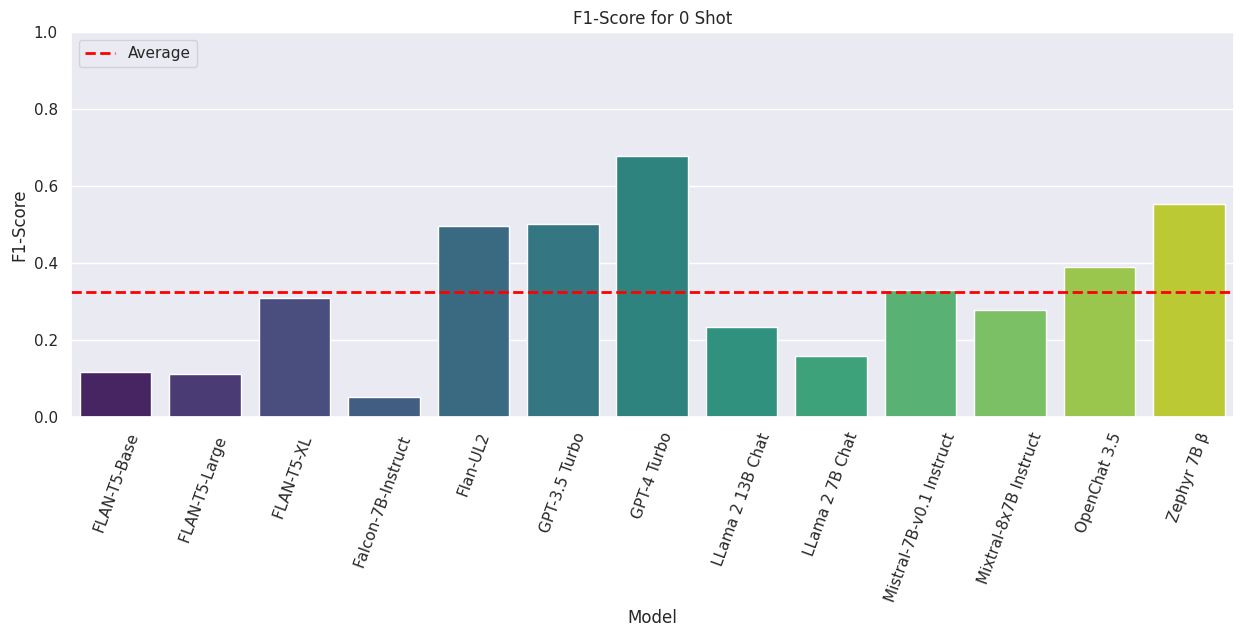

In [35]:
plot_results(results[results["run_type"] == "0 Shot"],
             title="F1-Score for 0 Shot", save_path="./figure/0_shot.png")

0.33107478820750297


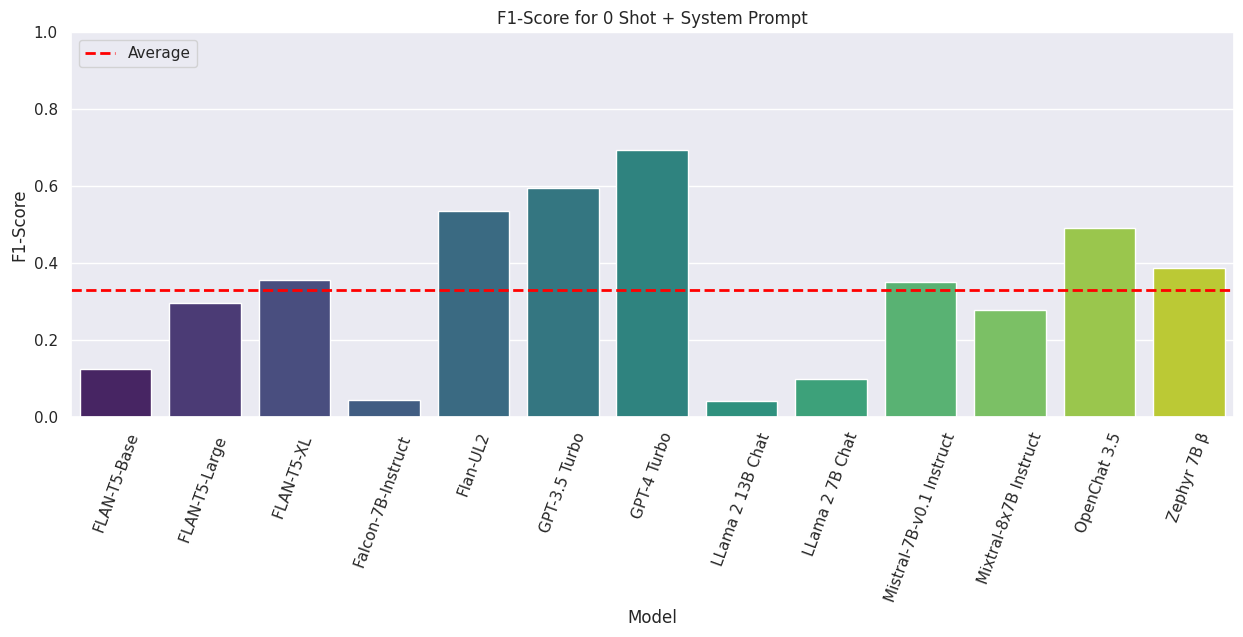

In [36]:
plot_results(results[results["run_type"] == "0 Shot + System Prompt"],
             title="F1-Score for 0 Shot + System Prompt",
             save_path="./figure/0_shot_system_prompt.png")

0.31249022101498575


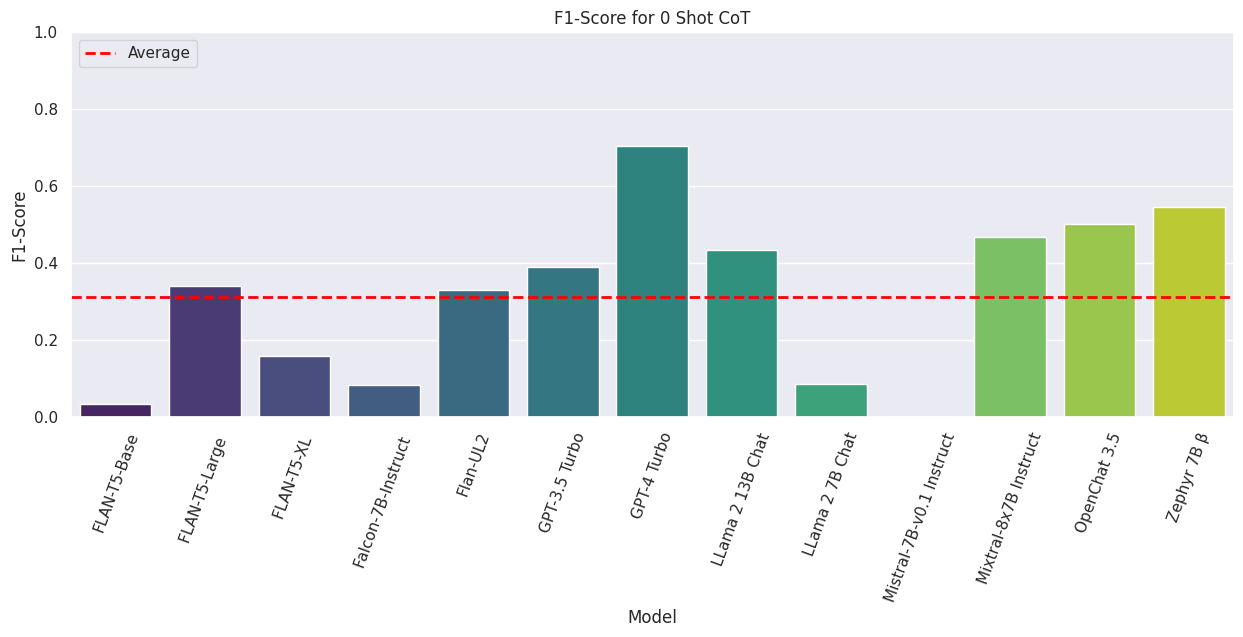

In [37]:
plot_results(results[results["run_type"] == "0 Shot CoT"],
             title="F1-Score for 0 Shot CoT",
             save_path="./figure/0_shot_cot.png")

0.41679817999608904


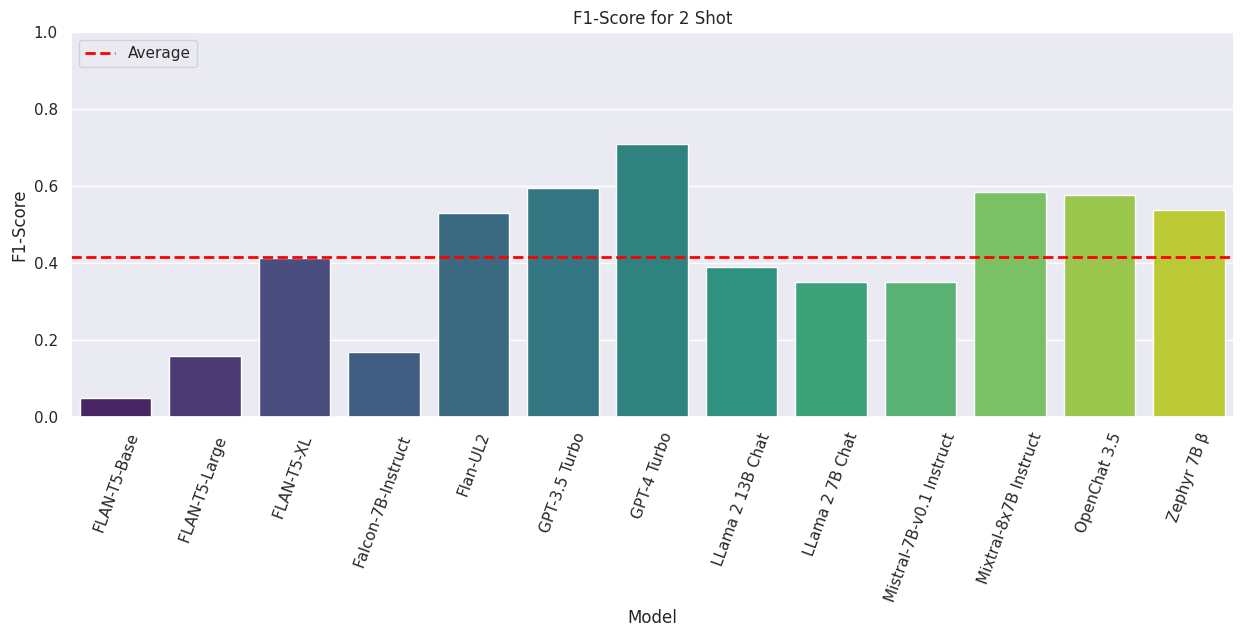

In [38]:
plot_results(results[results["run_type"] == "2 Shot"],
             title="F1-Score for 2 Shot", save_path="./figure/2_shot.png")

0.43200657326836384


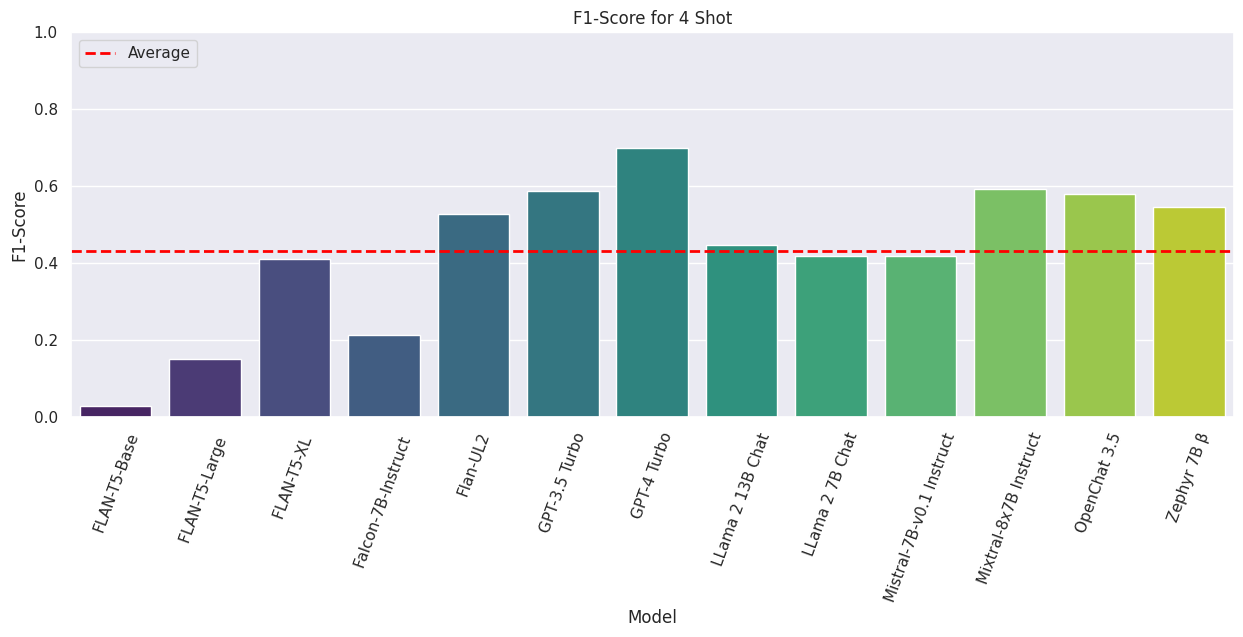

In [39]:
plot_results(results[results["run_type"] == "4 Shot"],
             title="F1-Score for 4 Shot", save_path="./figure/4_shot.png")

0.51886358752651


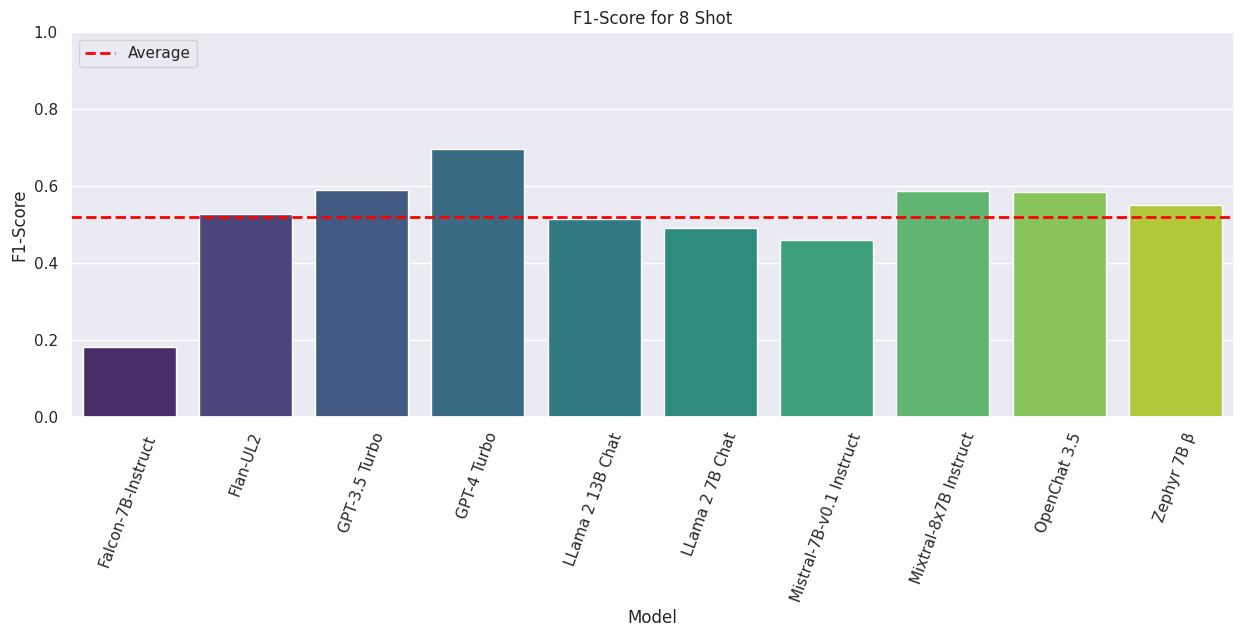

In [41]:
plot_results(results[results["run_type"] == "8 Shot"],
             title="F1-Score for 8 Shot", save_path="./figure/8_shot.png")

0.5650069329174132


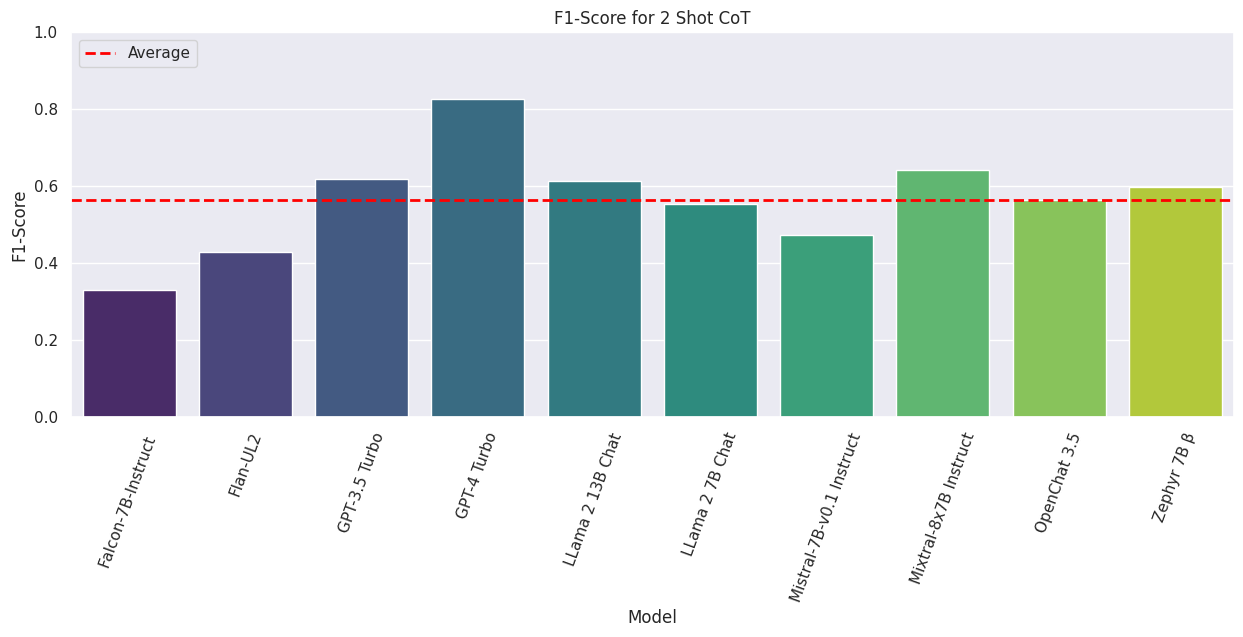

In [42]:
plot_results(results[results["run_type"] == "2 Shot CoT"],
             title="F1-Score for 2 Shot CoT",
             save_path="./figure/2_shot_cot.png")

0.569135132205717


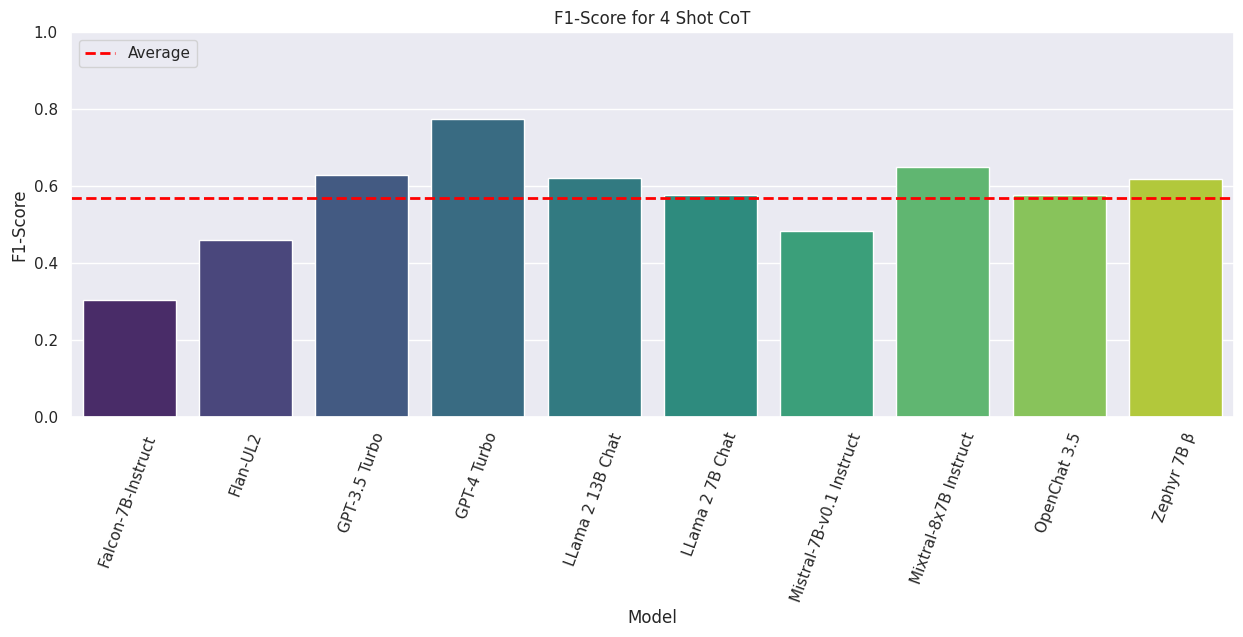

In [43]:
plot_results(results[results["run_type"] == "4 Shot CoT"],
             title="F1-Score for 4 Shot CoT",
             save_path="./figure/4_shot_cot.png")

0.5812446649090461


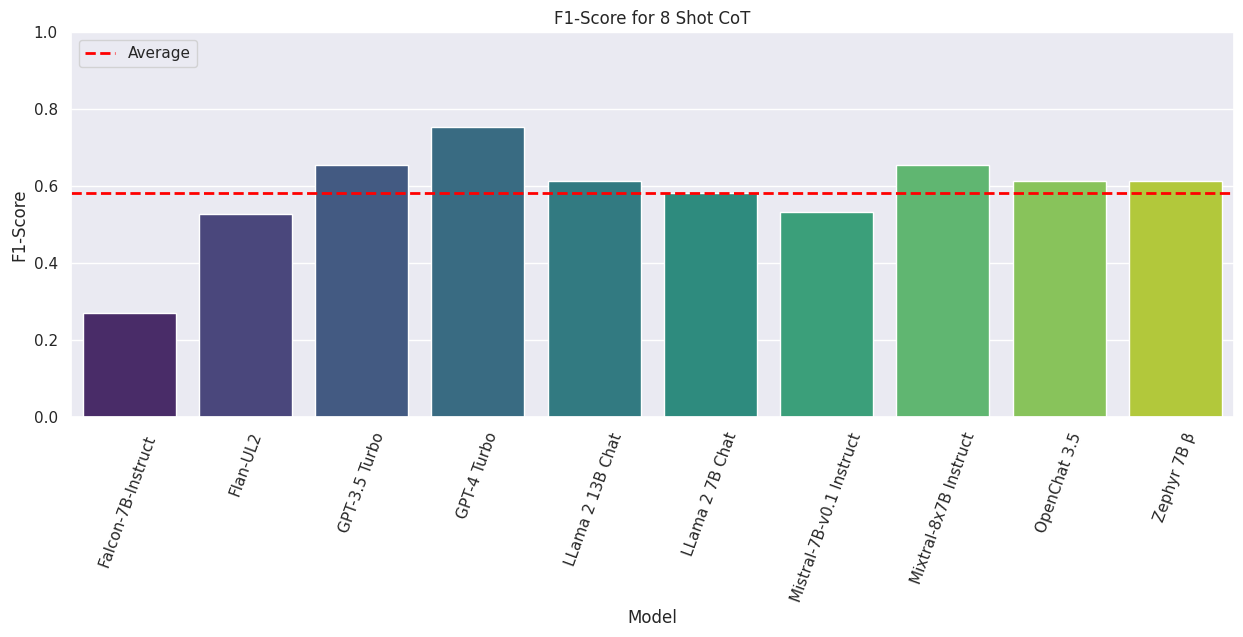

In [44]:
plot_results(results[results["run_type"] == "8 Shot CoT"],
             title="F1-Score for 8 Shot CoT",
             save_path="./figure/8_shot_cot.png")

# Models

In [45]:
hue_order = [
    '0 Shot',
    '0 Shot + System Prompt',
    '0 Shot CoT',
    '2 Shot',
    '4 Shot',
    '8 Shot',
    '2 Shot CoT',
    '4 Shot CoT',
    '8 Shot CoT'
]

results["model_name"].unique().tolist()

['FLAN-T5-Base',
 'FLAN-T5-Large ',
 'FLAN-T5-XL ',
 'Falcon-7B-Instruct ',
 'Flan-UL2',
 'GPT-3.5 Turbo',
 'GPT-4 Turbo',
 'LLama 2 13B Chat',
 'LLama 2 7B Chat',
 'Mistral-7B-v0.1 Instruct',
 'Mixtral-8x7B Instruct',
 'OpenChat 3.5',
 'Zephyr 7B β']

0.7143626367182867


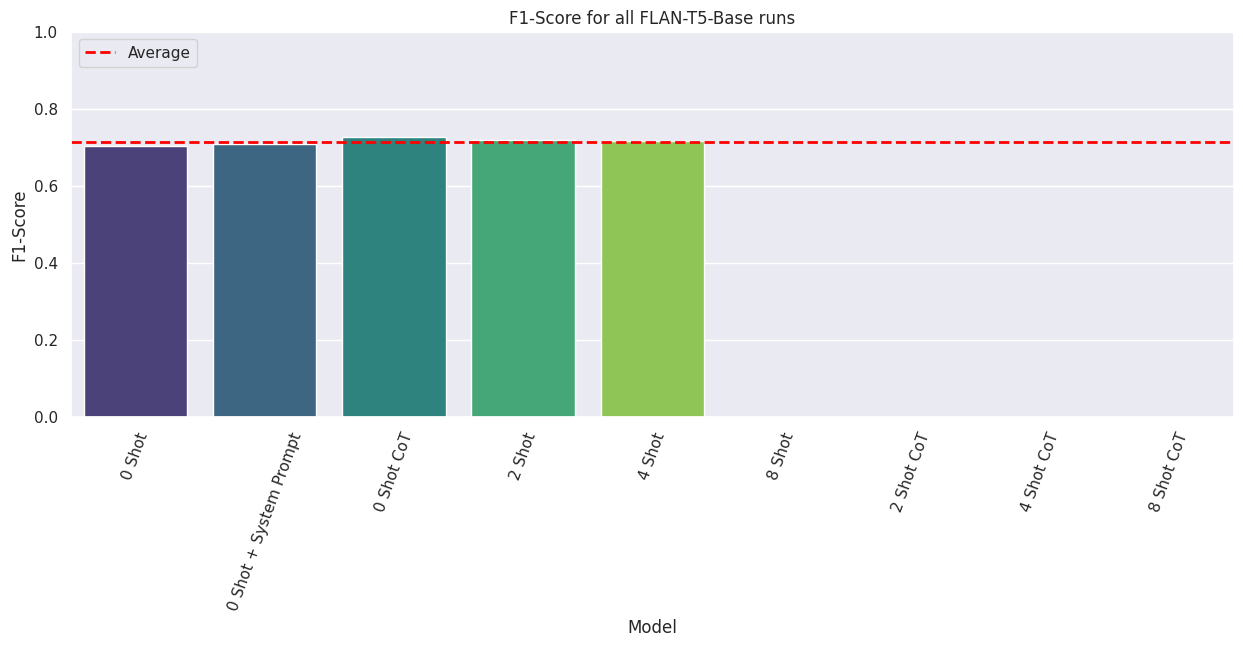

In [46]:
plot_results(results[results["model_name"] == "FLAN-T5-Base"],
             title="F1-Score for all FLAN-T5-Base runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/flan_t5_base.png", hue_order=hue_order)

0.6792962528290862


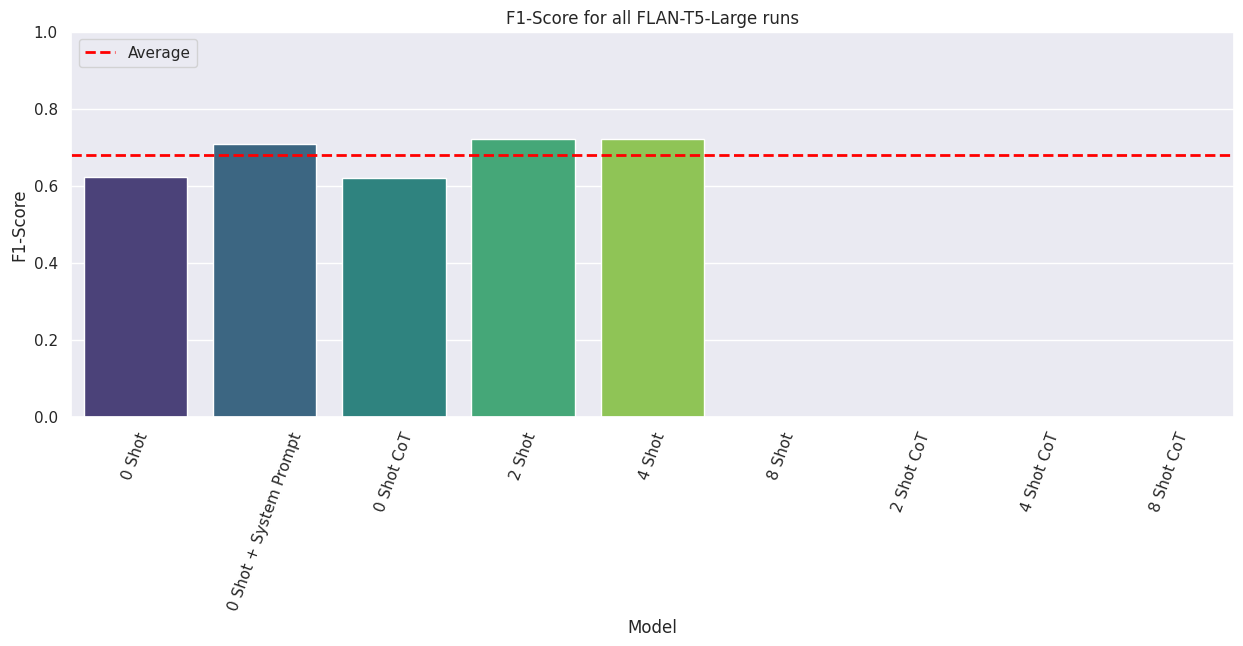

In [47]:
plot_results(results[results["model_name"] == "FLAN-T5-Large "],
             title="F1-Score for all FLAN-T5-Large runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/flan_t5_large.png", hue_order=hue_order)

0.5779419642469451


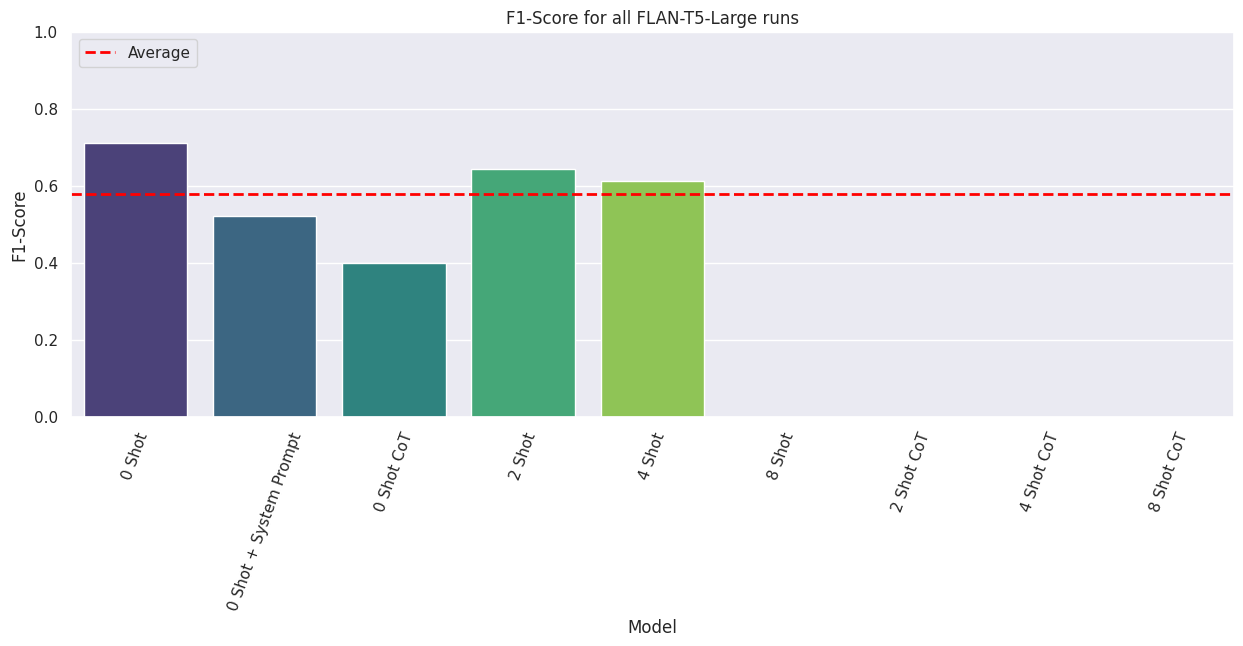

In [48]:
plot_results(results[results["model_name"] == "FLAN-T5-XL "],
             title="F1-Score for all FLAN-T5-Large runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/flan_t5_large.png", hue_order=hue_order)

0.6680770272047449


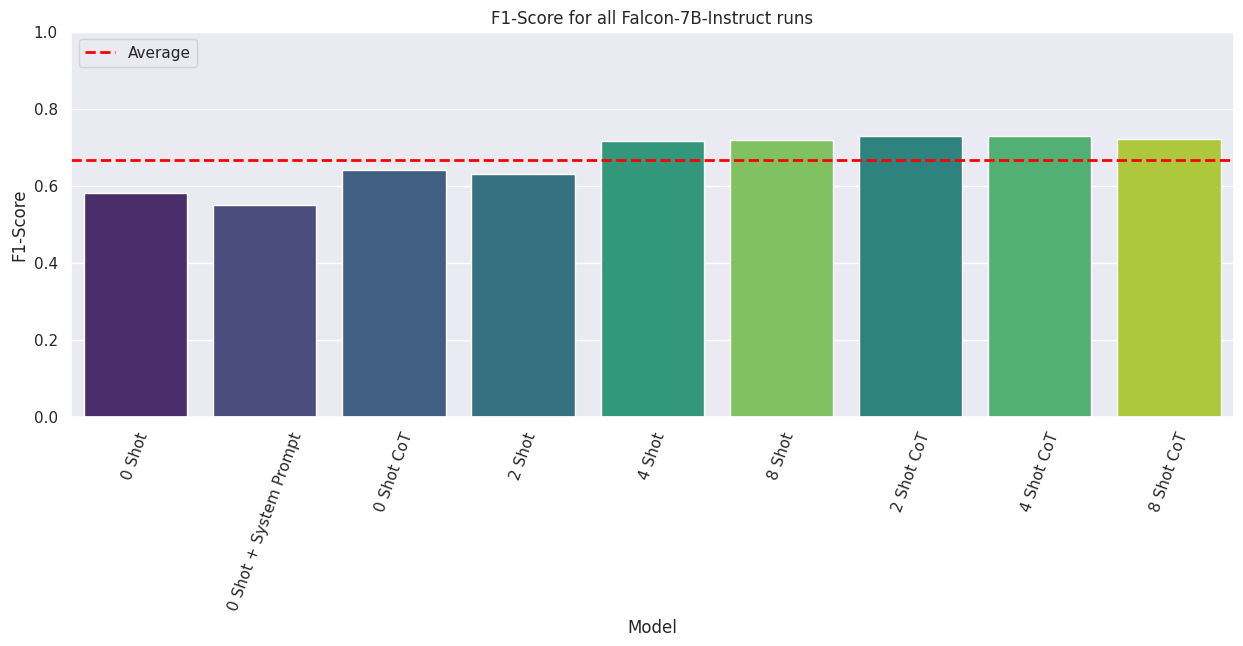

In [49]:
# Falcon-7B-Instruct 
plot_results(results[results["model_name"] == "Falcon-7B-Instruct "],
             title="F1-Score for all Falcon-7B-Instruct runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/falcon_7b_instruct.png", hue_order=hue_order)

0.7432130859025669


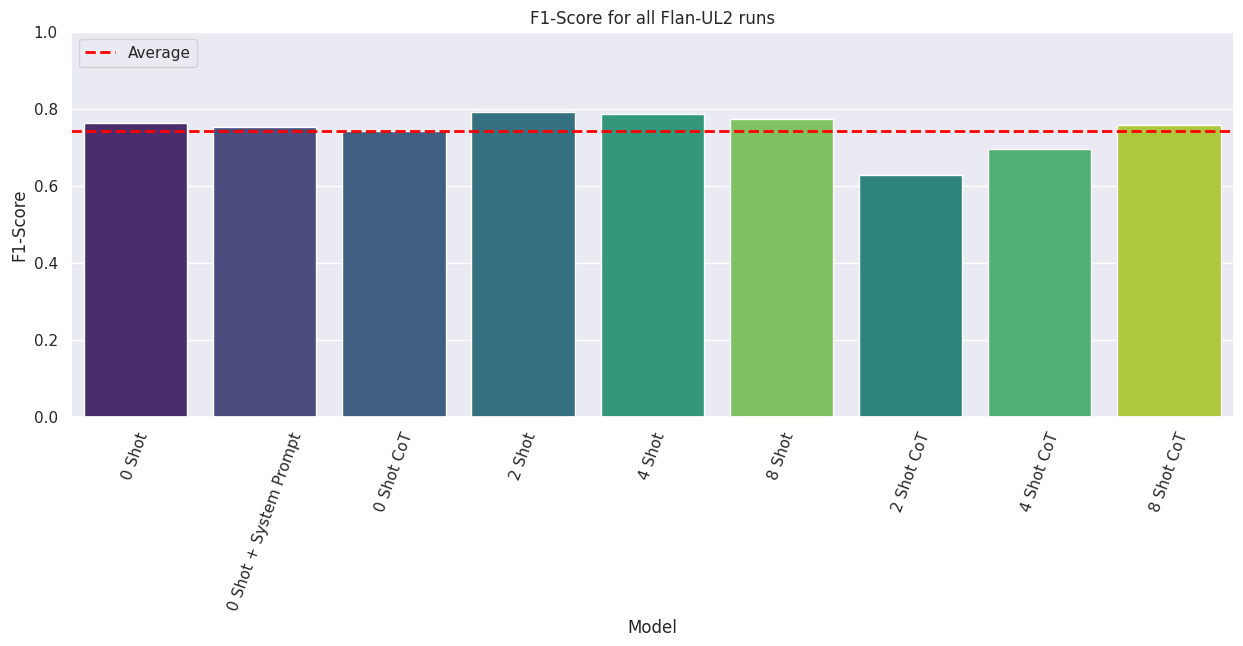

In [50]:
# Flan-UL2
plot_results(results[results["model_name"] == "Flan-UL2"],
             title="F1-Score for all Flan-UL2 runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/flan_ul2.png", hue_order=hue_order)

0.8100327205022143


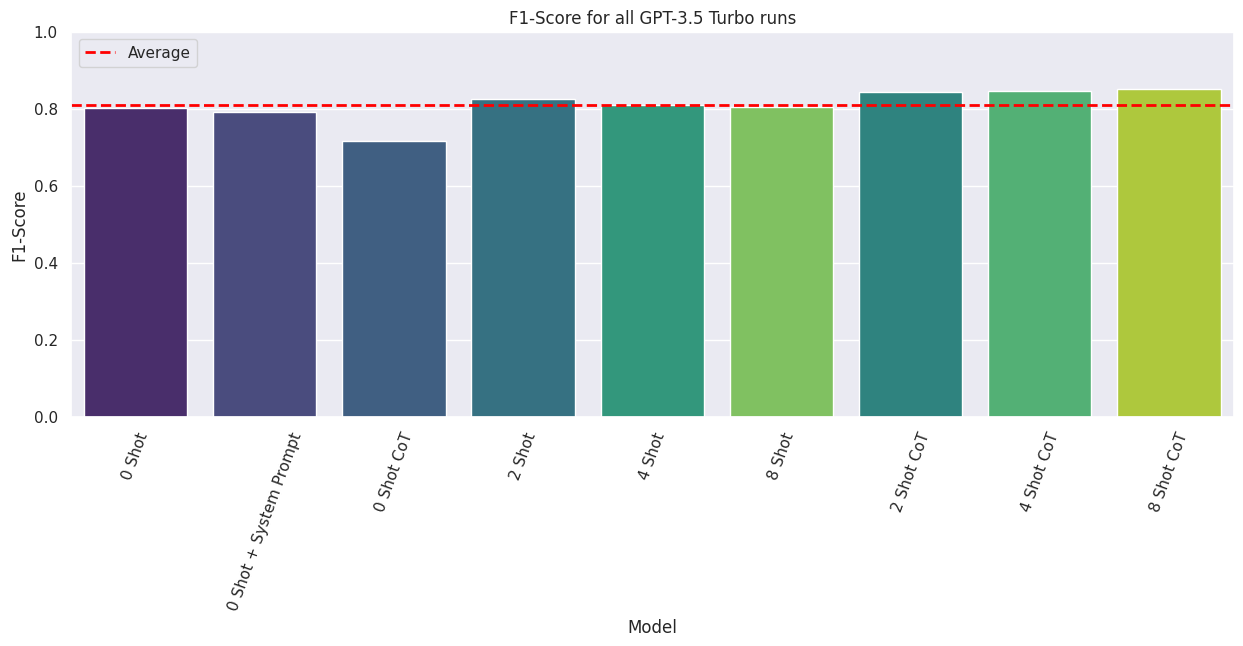

In [51]:
# GPT-3.5 Turbo
plot_results(results[results["model_name"] == "GPT-3.5 Turbo"],
             title="F1-Score for all GPT-3.5 Turbo runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/gpt_3_5_turbo.png", hue_order=hue_order)

0.8718050004050419


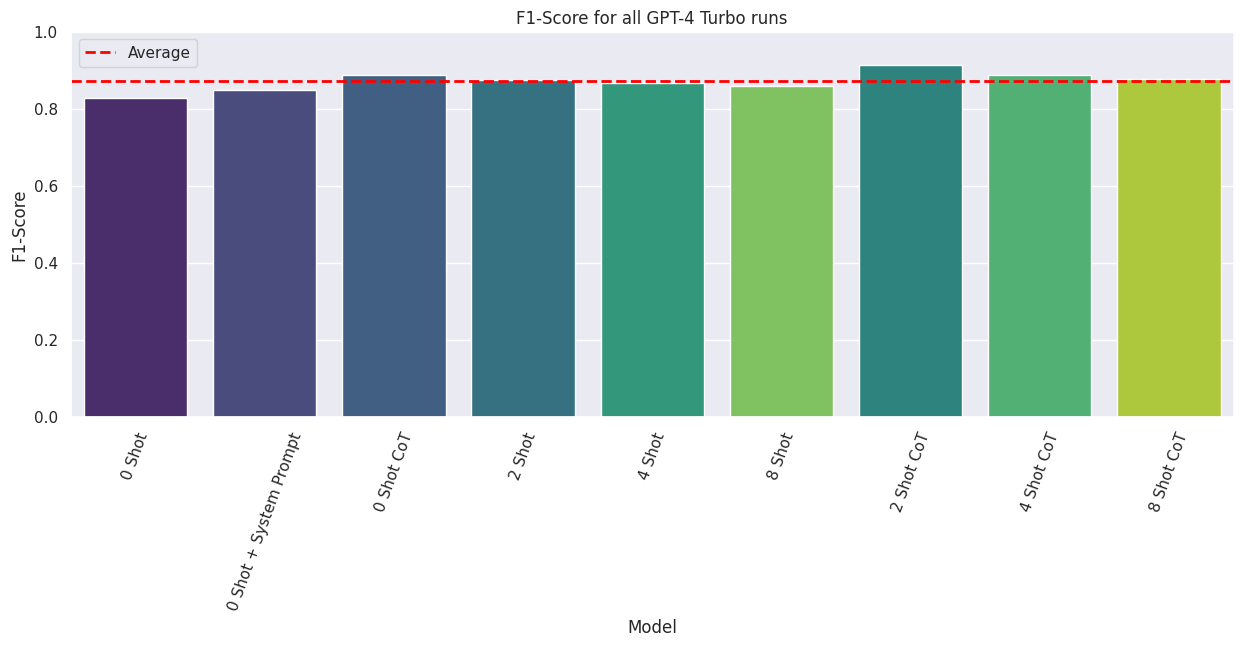

In [52]:
plot_results(results[results["model_name"] == "GPT-4 Turbo"],
             title="F1-Score for all GPT-4 Turbo runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/gpt_4_turbo.png", hue_order=hue_order)

0.3686789737094428


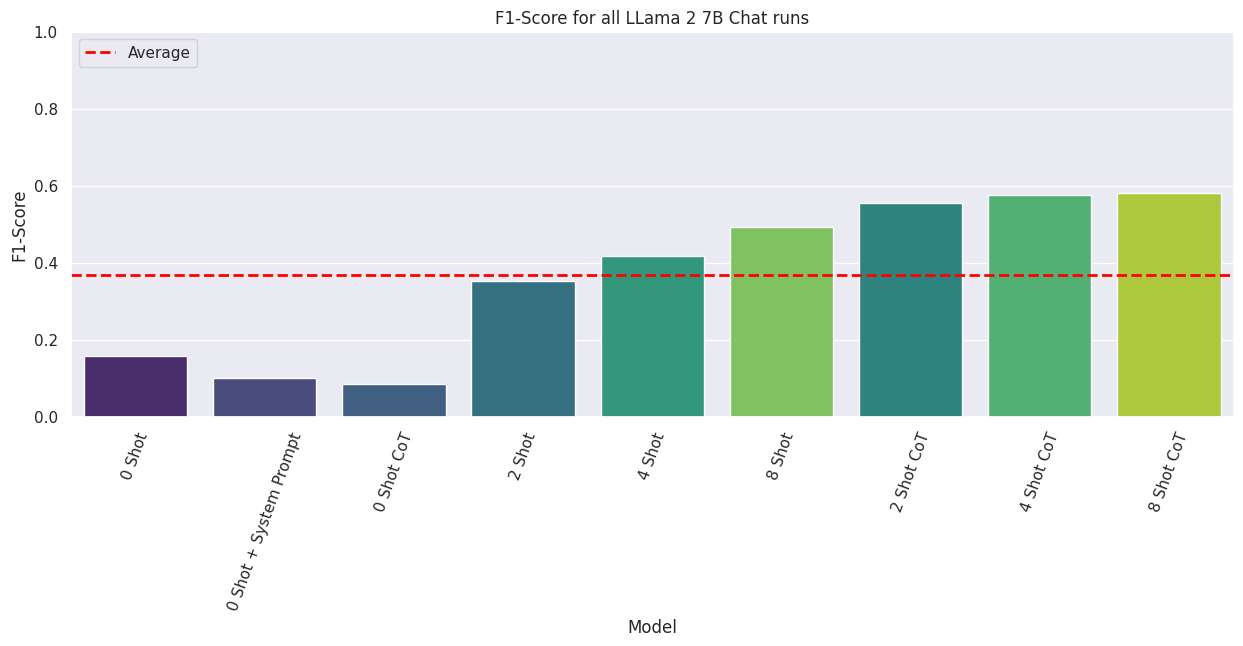

In [53]:
#LLama 2 7B Chat
plot_results(results[results["model_name"] == "LLama 2 7B Chat"],
             title="F1-Score for all LLama 2 7B Chat runs", x="run_type", metric_name="F1-Score", save_path="./figure/llama_2_7b_chat.png", hue_order=hue_order)

0.4350661399601833


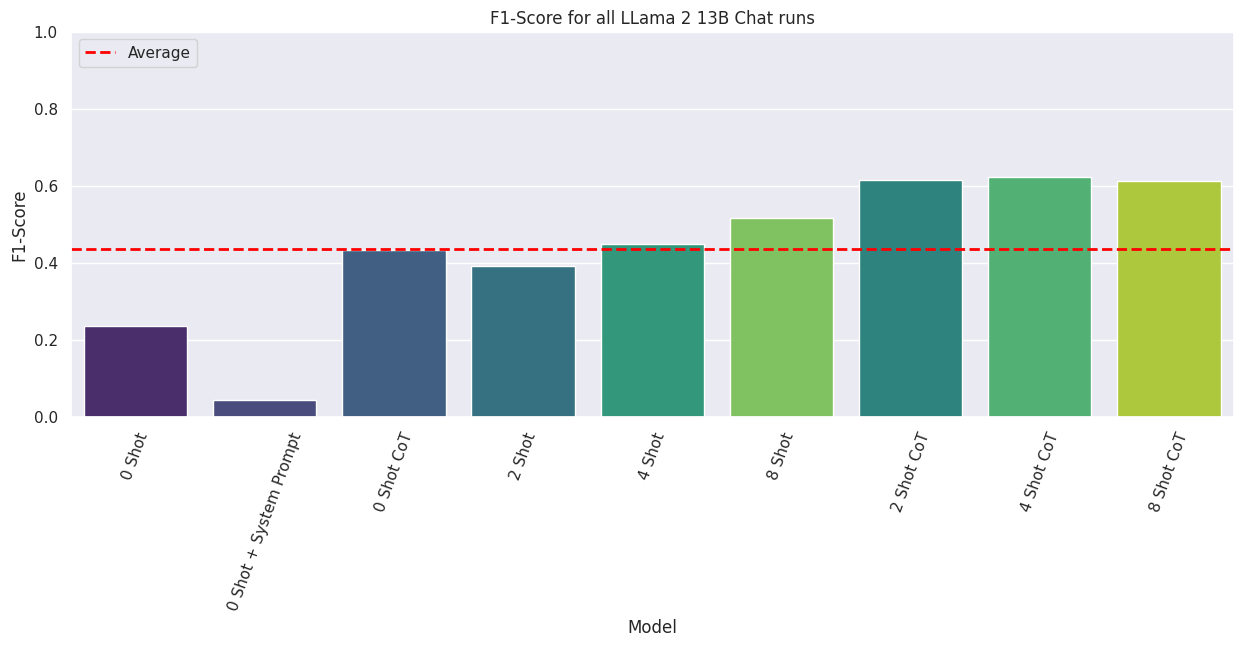

In [54]:
#LLama 2 13B Chat
plot_results(results[results["model_name"] == "LLama 2 13B Chat"],
             title="F1-Score for all LLama 2 13B Chat runs", x="run_type", metric_name="F1-Score", save_path="./figure/llama_2_13b_chat.png", hue_order=hue_order)

0.7021611591122797


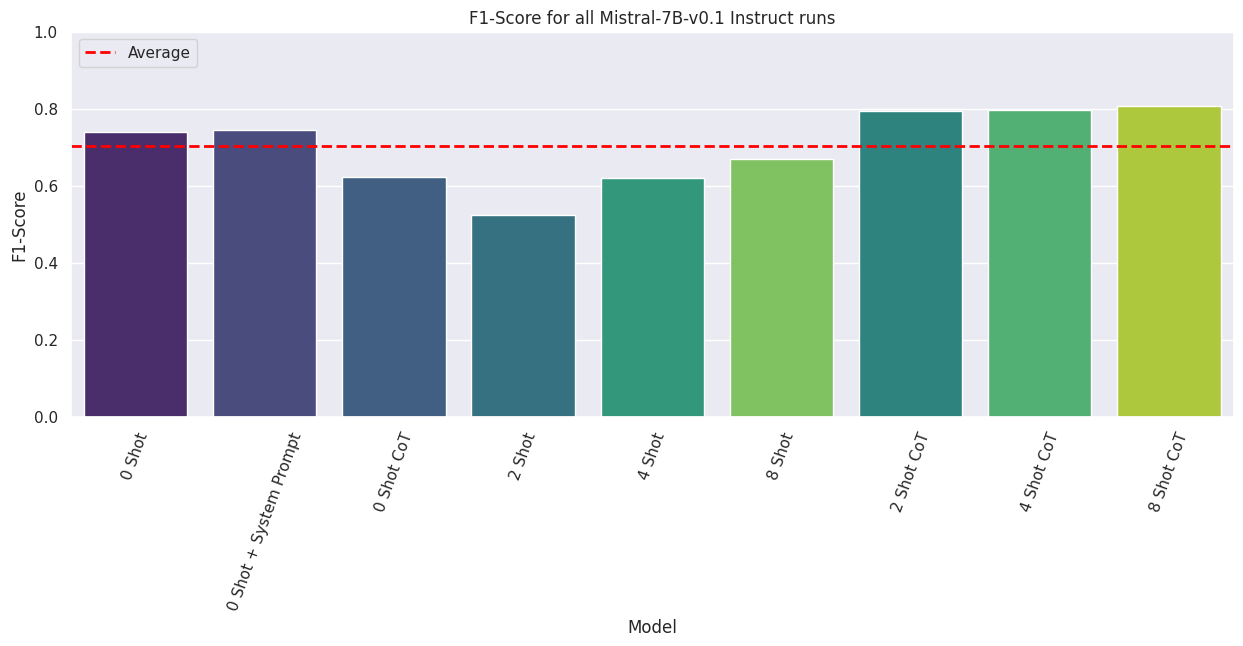

In [55]:
# Mistral-7B-v0.1 Instruct
plot_results(results[results["model_name"] == "Mistral-7B-v0.1 Instruct"],
             title="F1-Score for all Mistral-7B-v0.1 Instruct runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/mistral_7b_v0_1_instruct.png", hue_order=hue_order)

0.759492131968101


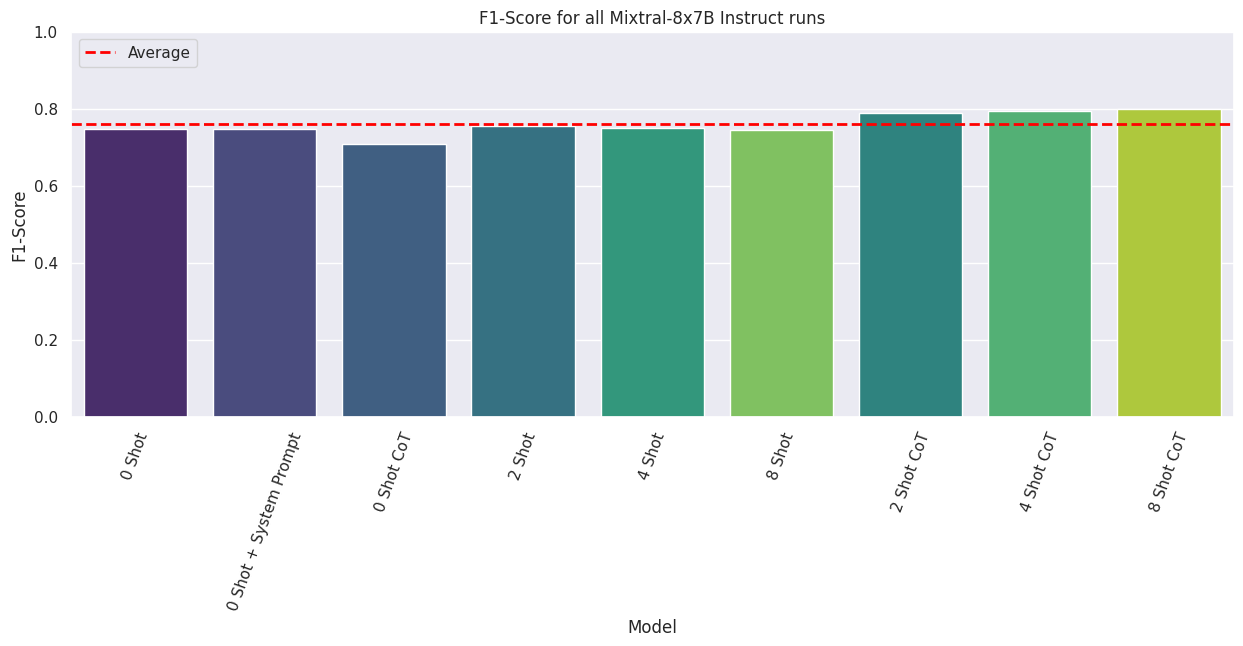

In [56]:
# Mixtral-8x7B Instruct
plot_results(results[results["model_name"] == "Mixtral-8x7B Instruct"],
             title="F1-Score for all Mixtral-8x7B Instruct runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/mixtral_8x7b_instruct.png", hue_order=hue_order)

0.7796289378878454


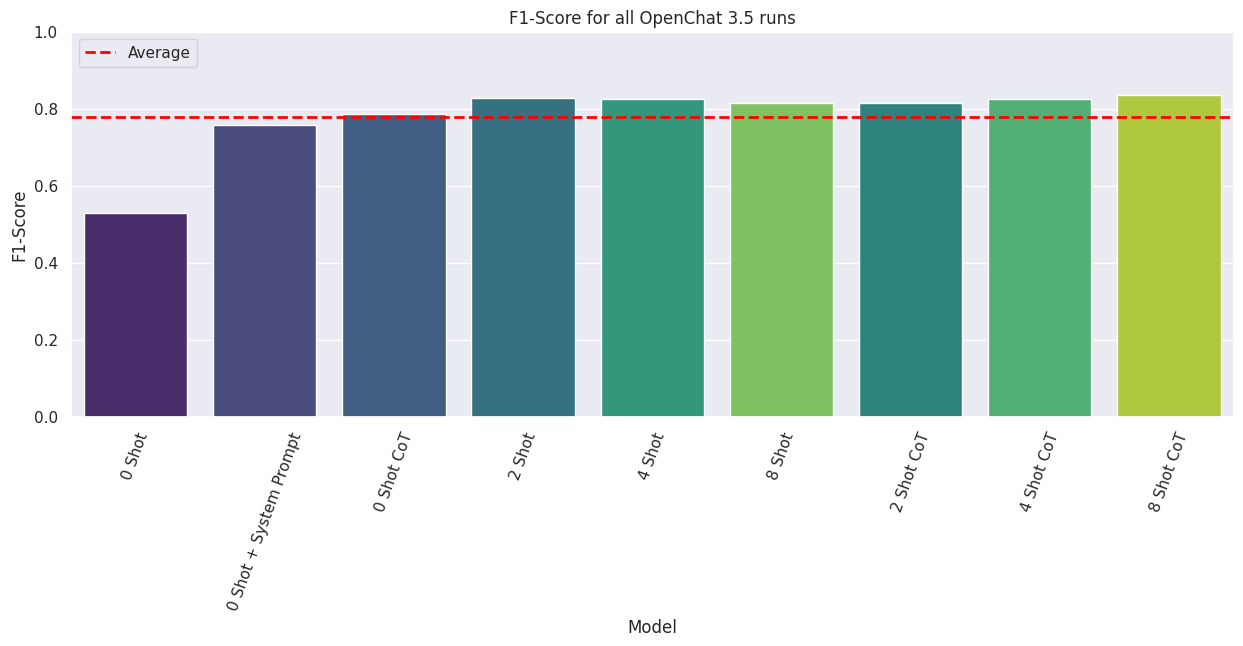

In [57]:
# OpenChat 3.5
plot_results(results[results["model_name"] == "OpenChat 3.5"],
             title="F1-Score for all OpenChat 3.5 runs", x="run_type", y="f1",
             metric_name="F1-Score", save_path="./figure/openchat_3_5.png", hue_order=hue_order)

0.5499948545238929


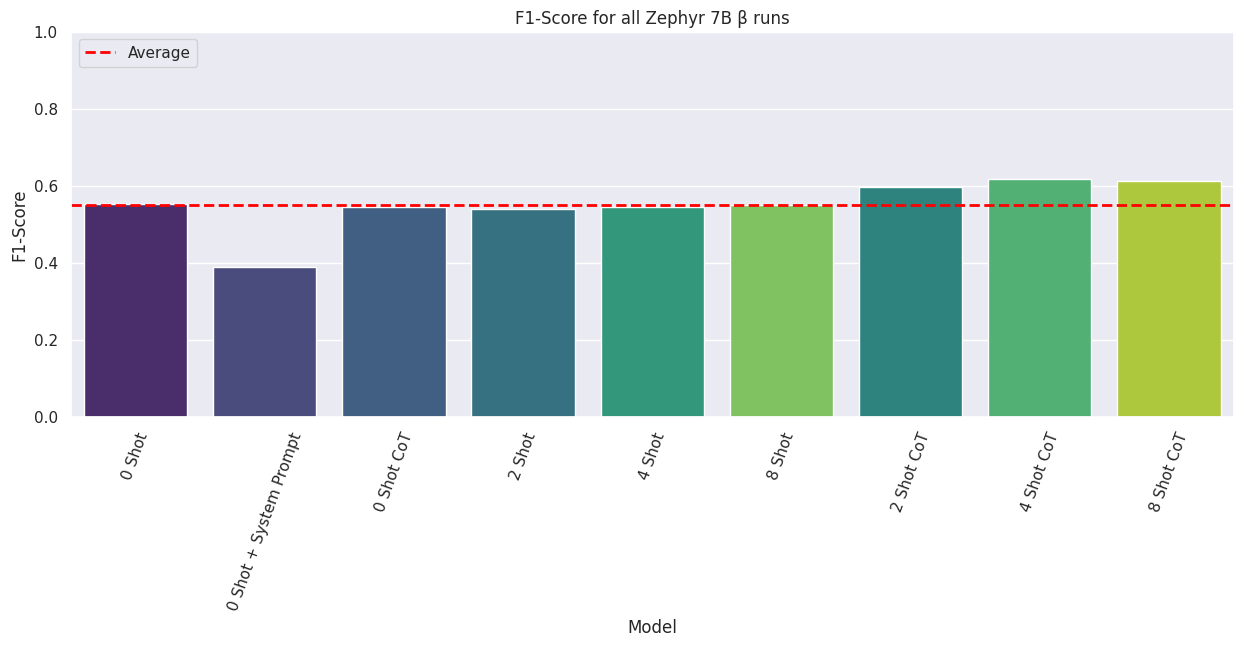

In [58]:
plot_results(results[results["model_name"] == "Zephyr 7B β"],
             title="F1-Score for all Zephyr 7B β runs", x="run_type", metric_name="F1-Score", save_path="./figure/zephyr.png", hue_order=hue_order)

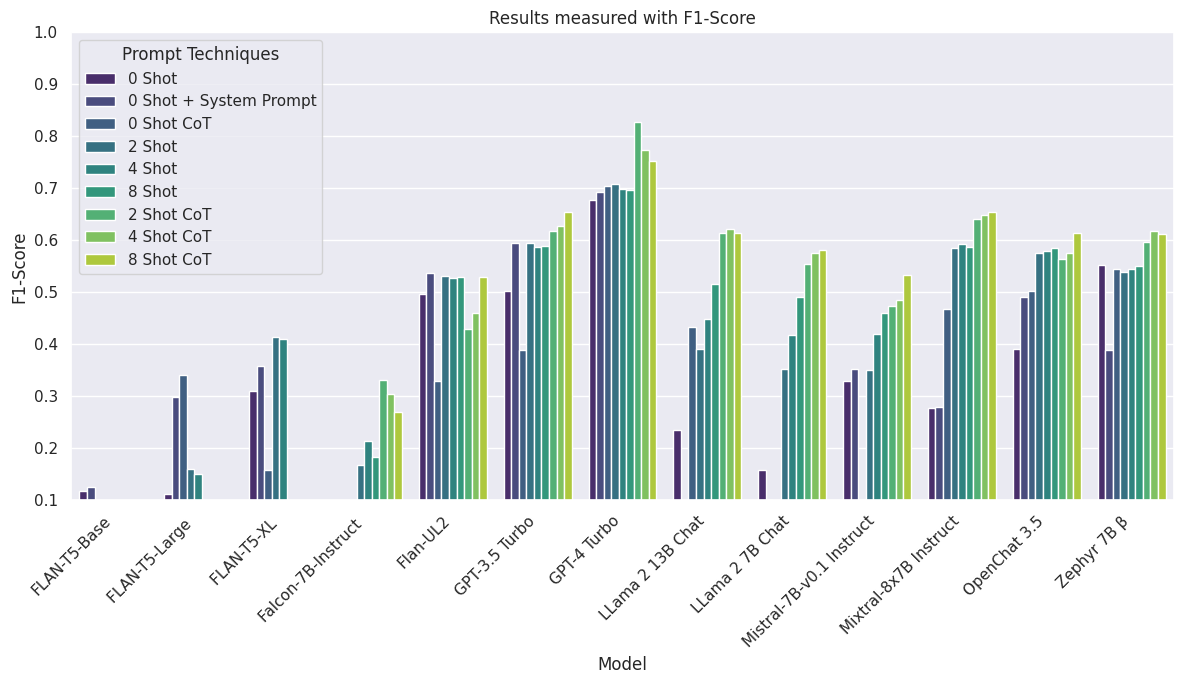

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your results data here
# results = ...

# Convert to DataFrame
df = pd.DataFrame(results)

# Define the desired order for the legend
hue_order = [
    '0 Shot',
    '0 Shot + System Prompt',
    '0 Shot CoT',
    '2 Shot',
    '4 Shot',
    '8 Shot',
    '2 Shot CoT',
    '4 Shot CoT',
    '8 Shot CoT'
]

# Plotting only the f1 part for Classification
plt.figure(figsize=(12, 7))

sns.barplot(x='model_name', y='mcc', hue='run_type', data=df, errorbar="sd",
            palette='viridis', hue_order=hue_order)
plt.title('Results measured with F1-Score')
plt.ylim(0.1, 1)  # Assuming the range from the given plot
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.viridis()
plt.legend(loc='upper left', title='Prompt Techniques')
plt.tight_layout()  # To ensure the rotated x-axis labels and legend fit into the figure
plt.savefig("./figure/all_f1.png")  # Saving the figure
plt.show()
